In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import operator
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('flight_delay.csv') # UPLOAD DATASET
df.head()

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0


In [3]:
df.describe()  # DATA DECRIPTION

,Delay
count,675513.000000
mean,9.912939
std,44.895875
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,1436.000000


In [4]:
df.columns # LOOKING FOR COLUMNS OF DATASET

Index(['Depature Airport', 'Scheduled depature time', 'Destination Airport',
       'Scheduled arrival time', 'Delay'],
      dtype='object')

In [5]:
df.isnull().values.any() # CHECKING NaN VALUES

False

<AxesSubplot:xlabel='Depature Airport'>

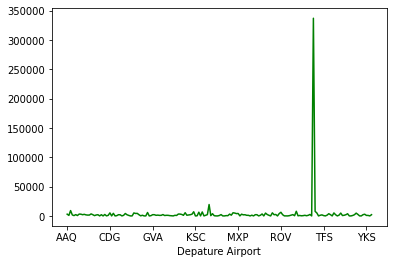

In [6]:
# VISUALYSING NUMBER OF FLIGHTS FROM DEPARTURE AIRPORT
df.groupby('Depature Airport')['Depature Airport'].count().plot(color='green')

<AxesSubplot:xlabel='Destination Airport'>

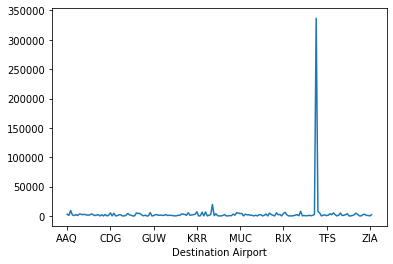

In [7]:
# VISUALYSING NUMBER OF FLIGHTS FROM DESTINATION AIRPORT
df.groupby('Destination Airport')['Destination Airport'].count().plot()

In [8]:
# SEPARATING Scheduled depature time AND Scheduled arrival time COLUMNS INTO TWO BY SPACE
# THE CODE BELOW SPLITS DATE AND TIME TO TWO COLUMNS
df[['DEP Date', 'DEP Time']] = df['Scheduled depature time'].str.split(' ', 1, expand=True)
df[['ARR Date', 'ARR Time']] = df['Scheduled arrival time'].str.split(' ', 1, expand=True)

In [9]:
# USING to_datetime TO GETTING DAY OF WEEK FROM DATE
df['DEP Date'] = pd.to_datetime(df['DEP Date'], errors='coerce')
df['DEP weekday'] = df['DEP Date'].dt.dayofweek
df['ARR Date'] = pd.to_datetime(df['ARR Date'], errors='coerce')
df['ARR weekday'] = df['ARR Date'].dt.dayofweek

In [10]:
# DATE ALSO CAN BE SPLITTED BY '-'
# THE CODE BELOW CREATES NEW COLUMNS FROM 1 COLUMN 
# IN THIS CASE: 'Scheduled depature time','Scheduled arrival time'
# THESE COLUMNS ARE SPLITTED TO YEAR, MONTH, DAY
df[['DEP Year', 'DEP Month','DEP Day1']] = df['Scheduled depature time'].str.split('-', expand=True)
df[['ARR Year', 'ARR Month','ARR Day1']] = df['Scheduled arrival time'].str.split('-', expand=True)

In [11]:
df # CHECKING data

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,DEP Date,DEP Time,ARR Date,ARR Time,DEP weekday,ARR weekday,DEP Year,DEP Month,DEP Day1,ARR Year,ARR Month,ARR Day1
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,2015-10-27,07:40:00,2015-10-27,20:45:00,1,1,2015,10,27 07:40:00,2015,10,27 20:45:00
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,2015-10-27,09:50:00,2015-10-27,20:35:00,1,1,2015,10,27 09:50:00,2015,10,27 20:35:00
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,2015-10-27,10:45:00,2015-10-27,23:35:00,1,1,2015,10,27 10:45:00,2015,10,27 23:35:00
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,2015-10-27,12:30:00,2015-10-28,01:20:00,1,2,2015,10,27 12:30:00,2015,10,28 01:20:00
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,2015-10-27,14:15:00,2015-10-27,16:40:00,1,1,2015,10,27 14:15:00,2015,10,27 16:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,2018-08-31,23:50:00,2018-09-01,02:10:00,4,5,2018,08,31 23:50:00,2018,09,01 02:10:00
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,2018-08-31,23:50:00,2018-09-01,01:10:00,4,5,2018,08,31 23:50:00,2018,09,01 01:10:00
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,2018-08-31,23:55:00,2018-09-01,01:20:00,4,5,2018,08,31 23:55:00,2018,09,01 01:20:00
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,2018-08-31,23:55:00,2018-09-01,03:15:00,4,5,2018,08,31 23:55:00,2018,09,01 03:15:00


In [12]:
# YOU CAN SEE FROM OUR DATASET
# THERE IS SMTH WRONG WITH 'DEP Day1' and 'ARR Day1' 
# WE COULDN'T GET ONLY DAY FROM DATE
# THE CODE BELOW HELP US TO GET DAY FROM DATE
df['DEP Day'] = df['DEP Date'].dt.day
df['ARR Day'] = df['ARR Date'].dt.day

In [13]:
df # CHECKING FOR UPDATES

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,DEP Date,DEP Time,ARR Date,ARR Time,DEP weekday,ARR weekday,DEP Year,DEP Month,DEP Day1,ARR Year,ARR Month,ARR Day1,DEP Day,ARR Day
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,2015-10-27,07:40:00,2015-10-27,20:45:00,1,1,2015,10,27 07:40:00,2015,10,27 20:45:00,27,27
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,2015-10-27,09:50:00,2015-10-27,20:35:00,1,1,2015,10,27 09:50:00,2015,10,27 20:35:00,27,27
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,2015-10-27,10:45:00,2015-10-27,23:35:00,1,1,2015,10,27 10:45:00,2015,10,27 23:35:00,27,27
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,2015-10-27,12:30:00,2015-10-28,01:20:00,1,2,2015,10,27 12:30:00,2015,10,28 01:20:00,27,28
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,2015-10-27,14:15:00,2015-10-27,16:40:00,1,1,2015,10,27 14:15:00,2015,10,27 16:40:00,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,2018-08-31,23:50:00,2018-09-01,02:10:00,4,5,2018,08,31 23:50:00,2018,09,01 02:10:00,31,1
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,2018-08-31,23:50:00,2018-09-01,01:10:00,4,5,2018,08,31 23:50:00,2018,09,01 01:10:00,31,1
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,2018-08-31,23:55:00,2018-09-01,01:20:00,4,5,2018,08,31 23:55:00,2018,09,01 01:20:00,31,1
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,2018-08-31,23:55:00,2018-09-01,03:15:00,4,5,2018,08,31 23:55:00,2018,09,01 03:15:00,31,1


In [14]:
# WE SPLITTED 'Scheduled depature time' AND 'Scheduled arrival time' TO YEAR,MONTH,DAY AND WEEKDAY
# SO, WE DON'T NEED FOR THESE COLUMNS BELOW IN FUTURE
# UNNEEDED COLUMNS CAN BE REMOVED USING 'drop function'
df.drop(['Scheduled depature time', 'DEP Day1'], axis='columns', inplace=True)
df.drop(['Scheduled arrival time','ARR Day1'], axis='columns', inplace=True)

In [15]:
df # CHECKING FOR UPDATES

,Depature Airport,Destination Airport,Delay,DEP Date,DEP Time,ARR Date,ARR Time,DEP weekday,ARR weekday,DEP Year,DEP Month,ARR Year,ARR Month,DEP Day,ARR Day
0,SVO,HAV,0.0,2015-10-27,07:40:00,2015-10-27,20:45:00,1,1,2015,10,2015,10,27,27
1,SVO,JFK,2.0,2015-10-27,09:50:00,2015-10-27,20:35:00,1,1,2015,10,2015,10,27,27
2,SVO,MIA,0.0,2015-10-27,10:45:00,2015-10-27,23:35:00,1,1,2015,10,2015,10,27,27
3,SVO,LAX,0.0,2015-10-27,12:30:00,2015-10-28,01:20:00,1,2,2015,10,2015,10,27,28
4,OTP,SVO,9.0,2015-10-27,14:15:00,2015-10-27,16:40:00,1,1,2015,10,2015,10,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675508,SVO,SVX,0.0,2018-08-31,23:50:00,2018-09-01,02:10:00,4,5,2018,08,2018,09,31,1
675509,LED,SVO,0.0,2018-08-31,23:50:00,2018-09-01,01:10:00,4,5,2018,08,2018,09,31,1
675510,SVO,EGO,0.0,2018-08-31,23:55:00,2018-09-01,01:20:00,4,5,2018,08,2018,09,31,1
675511,SVO,TSE,0.0,2018-08-31,23:55:00,2018-09-01,03:15:00,4,5,2018,08,2018,09,31,1


In [16]:
# WE NEED TO GET FLIGHT DURATION TIME
# THE CODE BELOW HELPS US TO GET FLIGHT DURATION TIME (IN MINUTES) TO NEW COLUMN

# WE CREATE THESE TWO VARIABLES BELOW ONLY FOR CONVERTING TO DATEDITME FORMAT
# BY USING THESE VARIABLES WE WILL GET DURATION TIME
# !!!  WE DON'T ADD THESE VARIABLES TO OUR DATASET  !!!
df['ARR Time1'] = pd.to_datetime(df["ARR Time"])
df['DEP Time1'] = pd.to_datetime(df["DEP Time"])

s = (df['ARR Time1'] - df['DEP Time1'])
df['Fligh Duration Time'] = s.dt.seconds / 60
fmt = operator.methodcaller('strftime', '%H:%M:%S')
df['Fligh Duration'] = pd.to_datetime(df['Fligh Duration Time'], unit='m').map(fmt)
df.head()

,Depature Airport,Destination Airport,Delay,DEP Date,DEP Time,ARR Date,ARR Time,DEP weekday,ARR weekday,DEP Year,DEP Month,ARR Year,ARR Month,DEP Day,ARR Day,ARR Time1,DEP Time1,Fligh Duration Time,Fligh Duration
0,SVO,HAV,0.0,2015-10-27,07:40:00,2015-10-27,20:45:00,1,1,2015,10,2015,10,27,27,2021-09-24 20:45:00,2021-09-24 07:40:00,785.0,13:05:00
1,SVO,JFK,2.0,2015-10-27,09:50:00,2015-10-27,20:35:00,1,1,2015,10,2015,10,27,27,2021-09-24 20:35:00,2021-09-24 09:50:00,645.0,10:45:00
2,SVO,MIA,0.0,2015-10-27,10:45:00,2015-10-27,23:35:00,1,1,2015,10,2015,10,27,27,2021-09-24 23:35:00,2021-09-24 10:45:00,770.0,12:50:00
3,SVO,LAX,0.0,2015-10-27,12:30:00,2015-10-28,01:20:00,1,2,2015,10,2015,10,27,28,2021-09-24 01:20:00,2021-09-24 12:30:00,770.0,12:50:00
4,OTP,SVO,9.0,2015-10-27,14:15:00,2015-10-27,16:40:00,1,1,2015,10,2015,10,27,27,2021-09-24 16:40:00,2021-09-24 14:15:00,145.0,02:25:00


In [17]:
df.columns # COLUMNS OF DATESET

Index(['Depature Airport', 'Destination Airport', 'Delay', 'DEP Date',
       'DEP Time', 'ARR Date', 'ARR Time', 'DEP weekday', 'ARR weekday',
       'DEP Year', 'DEP Month', 'ARR Year', 'ARR Month', 'DEP Day', 'ARR Day',
       'ARR Time1', 'DEP Time1', 'Fligh Duration Time', 'Fligh Duration'],
      dtype='object')

In [18]:
# FOR GETTING INDEX AND DATATYPE OF COLUMN info() FUNCTION CAN BE USED
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Depature Airport     675513 non-null  object        
 1   Destination Airport  675513 non-null  object        
 2   Delay                675513 non-null  float64       
 3   DEP Date             675513 non-null  datetime64[ns]
 4   DEP Time             675513 non-null  object        
 5   ARR Date             675513 non-null  datetime64[ns]
 6   ARR Time             675513 non-null  object        
 7   DEP weekday          675513 non-null  int64         
 8   ARR weekday          675513 non-null  int64         
 9   DEP Year             675513 non-null  object        
 10  DEP Month            675513 non-null  object        
 11  ARR Year             675513 non-null  object        
 12  ARR Month            675513 non-null  object        
 13  DEP Day       

In [42]:
# da_ta = df.iloc[:,[0,1,2,3,21,11,14,4]]
# da_ta.to_csv('da_ta.csv')

In [20]:
# FOR CONVENIENCE COLUMNS ARE SORTED AND THE NAME OF DATAFRAME CHANGED
# SOME COLUMNS NOT ADDED NEW DATA
new_data = df.iloc[:,[0,1,3,9,10,13,7,4,5,11,12,14,8,6,17,2]]
new_data = new_data.rename(columns={"Date": "DEP Date", "Flight Duration Time": "Flight Duration",'DEP Day1':'DEP Day'})
new_data.head()

,Depature Airport,Destination Airport,DEP Date,DEP Year,DEP Month,DEP Day,DEP weekday,DEP Time,ARR Date,ARR Year,ARR Month,ARR Day,ARR weekday,ARR Time,Fligh Duration Time,Delay
0,SVO,HAV,2015-10-27,2015,10,27,1,07:40:00,2015-10-27,2015,10,27,1,20:45:00,785.0,0.0
1,SVO,JFK,2015-10-27,2015,10,27,1,09:50:00,2015-10-27,2015,10,27,1,20:35:00,645.0,2.0
2,SVO,MIA,2015-10-27,2015,10,27,1,10:45:00,2015-10-27,2015,10,27,1,23:35:00,770.0,0.0
3,SVO,LAX,2015-10-27,2015,10,27,1,12:30:00,2015-10-28,2015,10,28,2,01:20:00,770.0,0.0
4,OTP,SVO,2015-10-27,2015,10,27,1,14:15:00,2015-10-27,2015,10,27,1,16:40:00,145.0,9.0


In [ ]:
# new_data.to_csv('new_data.csv')

In [21]:
# SOME COLUMNS WITH NUMERIC VALUES CONVERTED TO INTEGER TYPE 
new_data.iloc[:,[3,4,9,10]] = new_data.iloc[:,[3,4,9,10]].astype(int)

In [22]:
new_data.info() # CHECKIING FOR UPDATES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675513 entries, 0 to 675512
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Depature Airport     675513 non-null  object        
 1   Destination Airport  675513 non-null  object        
 2   DEP Date             675513 non-null  datetime64[ns]
 3   DEP Year             675513 non-null  int64         
 4   DEP Month            675513 non-null  int64         
 5   DEP Day              675513 non-null  int64         
 6   DEP weekday          675513 non-null  int64         
 7   DEP Time             675513 non-null  object        
 8   ARR Date             675513 non-null  datetime64[ns]
 9   ARR Year             675513 non-null  int64         
 10  ARR Month            675513 non-null  int64         
 11  ARR Day              675513 non-null  int64         
 12  ARR weekday          675513 non-null  int64         
 13  ARR Time      

In [23]:
# REMOVING OUTLIERS
# quantile() function DETECTS OUTLIERS
min_treshold,max_treshold = new_data.Delay.quantile([0.005,0.995])
min_treshold,max_treshold

(0.0, 254.43999999994412)

In [25]:
# REMOVING OUTLIERS
# TO REMOVE OUTLIERS WE JUST ASSIGN TO new_data VARIABLE ALL DATA WHICH ARE SMALLER THAN MAX_TRESHOLD
new_data = new_data[new_data['Delay']<max_treshold]
new_data.shape

(672135, 16)

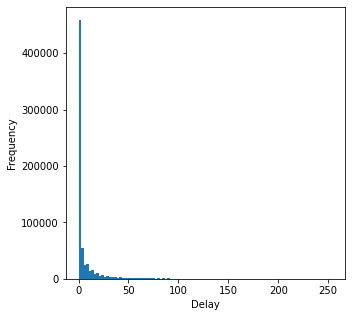

In [31]:
# VISUALISING THE DELAY COLUMN
# WE PLOTTED THE HISTOGRAM USING plot.hist() 
plt.figure(figsize=(5,5))
new_data['Delay'].plot.hist(stacked=True, bins=100);
plt.xlabel('Delay')
plt.show()

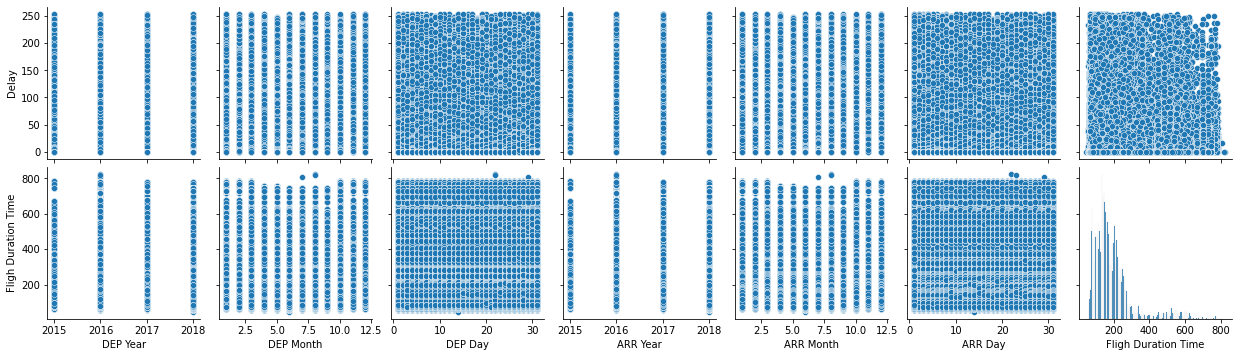

In [32]:
# PLOTTING ALL RELATIONSHIPS BETWEEN Fligh Duration Time and Delay
sns.pairplot(
    new_data,
    x_vars = ['DEP Year','DEP Month','DEP Day','ARR Year','ARR Month','ARR Day','Fligh Duration Time'],
    y_vars=['Delay','Fligh Duration Time'],
)

In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672135 entries, 0 to 675511
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Depature Airport     672135 non-null  object        
 1   Destination Airport  672135 non-null  object        
 2   DEP Date             672135 non-null  datetime64[ns]
 3   DEP Year             672135 non-null  int64         
 4   DEP Month            672135 non-null  int64         
 5   DEP Day              672135 non-null  int64         
 6   DEP weekday          672135 non-null  int64         
 7   DEP Time             672135 non-null  object        
 8   ARR Date             672135 non-null  datetime64[ns]
 9   ARR Year             672135 non-null  int64         
 10  ARR Month            672135 non-null  int64         
 11  ARR Day              672135 non-null  int64         
 12  ARR weekday          672135 non-null  int64         
 13  ARR Time      

In [36]:
# YOU CAN SEE THE TYPES OF OUR COLUMNS IN OUR DATA
# WE HAVE TO ENCODE object TYPES TO NUMERIC 
# IT BECOMES TO MACHINE READABLE FORMAT
# WE CAN ANY ENCODER
# IN OUR CASE LabelEncoder() IS USED 
encoder = LabelEncoder()
new_data.iloc[:,[0,1,2,7,8,13]] = new_data.iloc[:,[0,1,2,7,8,13]].apply(encoder.fit_transform)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672135 entries, 0 to 675511
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Depature Airport     672135 non-null  int64  
 1   Destination Airport  672135 non-null  int64  
 2   DEP Date             672135 non-null  int64  
 3   DEP Year             672135 non-null  int64  
 4   DEP Month            672135 non-null  int64  
 5   DEP Day              672135 non-null  int64  
 6   DEP weekday          672135 non-null  int64  
 7   DEP Time             672135 non-null  int64  
 8   ARR Date             672135 non-null  int64  
 9   ARR Year             672135 non-null  int64  
 10  ARR Month            672135 non-null  int64  
 11  ARR Day              672135 non-null  int64  
 12  ARR weekday          672135 non-null  int64  
 13  ARR Time             672135 non-null  int64  
 14  Fligh Duration Time  672135 non-null  float64
 15  Delay            

In [35]:
# new_data.to_csv('new_data.csv')

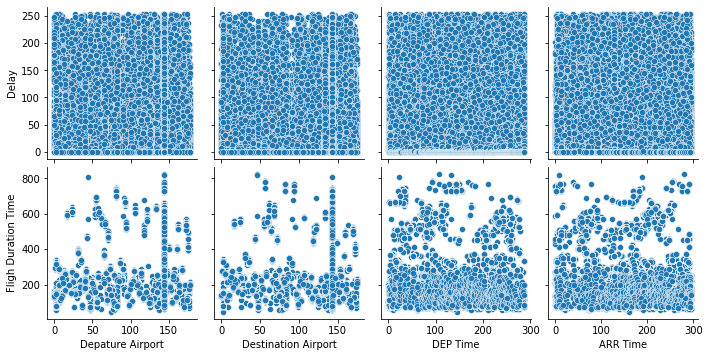

In [37]:
# PLOTTING CONVERTED COLUMNS RELATIONSHIPS BTW Delay and Flight Duration Time

sns.pairplot(
    new_data,
    x_vars = ['Depature Airport','Destination Airport','DEP Time','ARR Time'],
    y_vars=['Delay','Fligh Duration Time'],
)

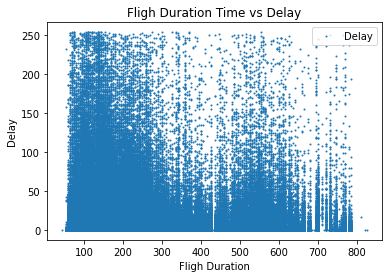

In [39]:
# RELATIONSHIP BETWEEN Delay and FLIGHT DURATION

new_data.plot(x='Fligh Duration Time', y='Delay', style='o',markersize=1)
plt.title('Fligh Duration Time vs Delay')
plt.xlabel('Fligh Duration')
plt.ylabel('Delay')
plt.show()

In [40]:
# IN OUR DATASET THERE IS FLIGHT DATES IN THESE YEARS 2015,2016,2017,2018
# WE TAKE ALL YEARS WHICH ARE SMALLER THAT 2018 AS train_data
# AND 2018 YEAR AS test_data

train_data = new_data[new_data['DEP Year']<=2017]
test_data = new_data[new_data['DEP Year']>2017]

In [43]:
# SPLITTING DATASET
# FOR USING MODEL WE SPLIT ONLY Fligh Duration Time and Delay
# PREDICTOR: Fligh Duration Time
# TARGET: Delay

X_train,y_train=train_data.loc[:,train_data.columns == 'Fligh Duration Time'],train_data['Delay']
X_test,y_test=test_data.loc[:, test_data.columns == 'Fligh Duration Time'], test_data['Delay']

In [44]:
# from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()
# scaler.fit_transform(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [45]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# x_train_reduced = pca.fit_transform(X_train)

# print(pca.explained_variance_ratio_)
# print(np.sum(pca.explained_variance_ratio_))

# plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], marker='.')
# plt.show()

In [47]:
# TESTING WITH LINEAR REGRESSION MODEL 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
print(f"Model intercept : {linear_regression.intercept_}")
print(f"Model coefficients : {linear_regression.coef_}")

Model intercept : 5.322684250117315
Model coefficients : [0.01627714]


In [48]:
# MEASURING PERFORMANCE OF LINEAR REGRESSION MODEL
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.348050804475623
Mean Squared Error: 354.4951688931716
Root Mean Squared Error: 18.828042088681755
R2 Score: -0.042731738870564806


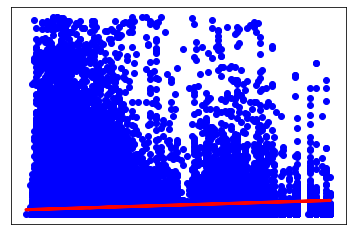

In [50]:
# PLOTTING
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red',linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()